# Exercise 2a

In [ ]:
import numpy as np
from scipy.special import roots_legendre
from scipy.integrate import quad
import pandas as pd

def lagrange(x, r, i):
    prod = 1
    for j in range(len(r)):
        if j != i:
            prod *= (x - r[j]) / (r[i] - r[j])
    return prod

def LegendreQuad(n):

    #Step 1
    r = np.sort(roots_legendre(n)[0])  # compute roots of Legendre polynomials and sort

    #Step 2
    c = np.zeros(n)
    for i in range(n):
        c[i], _ = quad(lambda x: lagrange(x, r, i), -1, 1, epsabs=1e-12)  # quadrature rules

    return r,c


for k in range(2, 11):
    r,c = LegendreQuad(k)
    print('-'*28)
    print(f'For n = {k}:')
    results = pd.DataFrame({'Roots': r, 'Coefficients': c.flatten()})
    print(results)

----------------------------
For n = 2:
     Roots  Coefficients
0 -0.57735           1.0
1  0.57735           1.0
----------------------------
For n = 3:
      Roots  Coefficients
0 -0.774597      0.555556
1  0.000000      0.888889
2  0.774597      0.555556
----------------------------
For n = 4:
      Roots  Coefficients
0 -0.861136      0.347855
1 -0.339981      0.652145
2  0.339981      0.652145
3  0.861136      0.347855
----------------------------
For n = 5:
      Roots  Coefficients
0 -0.906180      0.236927
1 -0.538469      0.478629
2  0.000000      0.568889
3  0.538469      0.478629
4  0.906180      0.236927
----------------------------
For n = 6:
      Roots  Coefficients
0 -0.932470      0.171324
1 -0.661209      0.360762
2 -0.238619      0.467914
3  0.238619      0.467914
4  0.661209      0.360762
5  0.932470      0.171324
----------------------------
For n = 7:
      Roots  Coefficients
0 -0.949108      0.129485
1 -0.741531      0.279705
2 -0.405845      0.381830
3  0.0000

# Exercise 2b

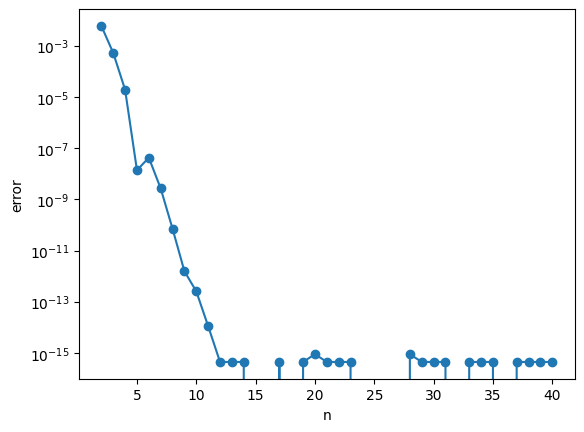

In [ ]:
import matplotlib.pyplot as plt

# inputs
a, b = 0, 1
nvec = np.arange(2, 41)
f = lambda x: 4 / (1 + x ** 2)
t = lambda x: 0.5 * (b - a) * x + 0.5 * (b + a)

# algorithm
error = []
for n in nvec:
    r,c = LegendreQuad(n)
    xr = t(r)  # transform roots from [-1,1] to [a,b] interval
    I = 0.5*(b - a)*np.sum(c*f(xr))  # quadrature rule over [a,b]
    error.append(np.abs(I - np.pi))  # error

# display
plt.figure()
plt.semilogy(nvec, error, 'o-')
plt.xlabel('n')
plt.ylabel('error')
plt.show()


# Exercise 2c

In [ ]:
# inputs

n = 3 # degree
npart = 4;  # partitions for composite quadrature

a, b = 0, 1
f = lambda x: 4 / (1 + x ** 2)
t = lambda x,a,b: 0.5 * (b - a) * x + 0.5 * (b + a)

# algorithm
r,c = LegendreQuad(n)

h = (b-a)/npart # interval
x0 = a
xf = x0+h;

I = 0  # integral
for j in range(npart): #loop over number of partitions
    xr = t(r,x0,xf);  #transform roots from [-1,1] to [xr,xr+1] interval
    I = I + 0.5*(xf-x0)*sum(c*f(xr)) #quadrature rule over [xr,xr+1] (update I)
    x0 = xf # move to next partition
    xf = xf+h

error = I - np.pi

# Display the error
print("The error is", error)

The error is -7.249929101504904e-09
